In [1]:
! pip install bertopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.vectorizers import ClassTfidfTransformer
import pandas as pd
import numpy as np

In [2]:
text_clean = pd.read_excel("speeches_sentences_cleaned.xlsx")
text_clean['party'] = text_clean['party'].replace("I", "D")

In [3]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=1000)

# Initiate HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples=20,
                        gen_min_span_tree=True,
                        prediction_data=True)

# Initiate ClassTfidfTransformer
# we add this to remove stopwords that can pollute topics
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [4]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(text_clean['clean_text'], show_progress_bar=False)

In [5]:
# Initiate BERTopic
topic_model = BERTopic(embedding_model=sentence_model, umap_model=umap_model, hdbscan_model=hdbscan_model, ctfidf_model=ctfidf_model, language="english", calculate_probabilities=True)

In [6]:
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(text_clean['clean_text'].astype('str'), embeddings)

In [7]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1357,-1_our_you_united_china,"[our, you, united, china, as, with, we, or, th...",[we are seeing i think how china abuses our op...
1,0,236,0_enough_what_think_do,"[enough, what, think, do, happen, it, happened...",[i was there and look what has happened now af...
2,1,161,1_bipartisan_senate_thank_congress,"[bipartisan, senate, thank, congress, bill, ac...",[thank you and thank ranking member mccaul for...
3,2,148,2_liberty_your_freedom_versus,"[liberty, your, freedom, versus, right, courag...",[over the past year they have been an inspirat...
4,3,132,3_success_happening_stories_developments,"[success, happening, stories, developments, ev...",[this event was important to better understand...
5,4,109,4_tiananmen_square_violence_protests,"[tiananmen, square, violence, protests, force,...",[during the antiextradition bill and prodemocr...
6,5,107,5_beijing_promises_china_government,"[beijing, promises, china, government, foot, i...",[many of them are very young people who are ri...
7,6,97,6_sanctions_administration_law_collusion,"[sanctions, administration, law, collusion, el...",[because the way the law is defined where it s...
8,7,86,7_extradition_bill_carrie_proposed,"[extradition, bill, carrie, proposed, chief, l...",[rising resentment in hong kong is not simply ...
9,8,82,8_britain_systems_declaration_joint,"[britain, systems, declaration, joint, agreeme...",[and mr chairman as you and ranking member mcc...


In [8]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=15)

In [9]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
text_clean['topic_prediction'] = topic_prediction
# Subset the top 10 topics
text_top_topics = text_clean.loc[text_clean['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,236
1,1,161
2,2,148
3,3,132
4,4,109
5,5,107
6,6,97
7,7,86
8,8,82
9,9,80


<Axes: xlabel='Topic', ylabel='Frequency'>

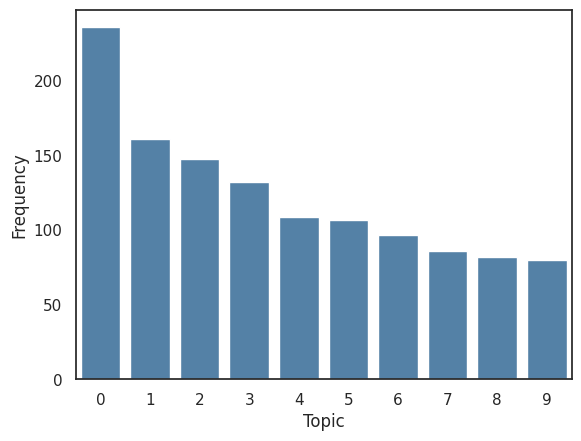

In [10]:
import seaborn as sns
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='steelblue')

In [11]:
text_top_topics.groupby(['topic_prediction','party'])['topic_prediction'].count()

topic_prediction  party
0                 D        106
                  R        130
1                 D         88
                  R         73
2                 D         48
                  R        100
3                 D         50
                  R         82
4                 D         47
                  R         62
5                 D         43
                  R         64
6                 D         51
                  R         46
7                 D         35
                  R         51
8                 D         30
                  R         52
9                 D         37
                  R         43
Name: topic_prediction, dtype: int64

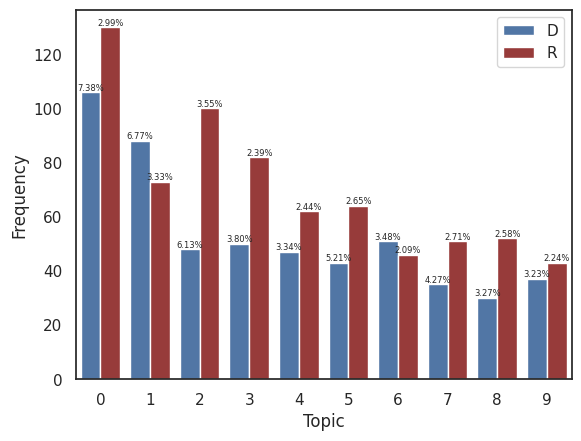

In [24]:
import matplotlib.pyplot as plt
topic_count = pd.read_excel("topic_count.xlsx")
sns.set_palette(sns.color_palette(["#4374B3","#A62C2B"]))
ax = sns.barplot(x="Topic", y="Frequency", hue="Party", data=topic_count, ci=None)
for p,value in zip(ax.patches, topic_count['prop_party']):
    ax.annotate("{:.2%}".format(value), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=6)
plt.legend(title="")

In [12]:
text_clean_dem = pd.read_excel("speeches_sentences_cleaned_dem.xlsx")
embeddings_dem = sentence_model.encode(text_clean_dem['clean_text'], show_progress_bar=False)

In [13]:
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(text_clean_dem['clean_text'].astype('str'), embeddings_dem)

In [14]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

In [15]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
text_clean_dem['topic_prediction'] = topic_prediction
# Subset the top 10 topics
text_top_topics = text_clean_dem.loc[text_clean_dem['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,152
1,1,115
2,2,70
3,3,63
4,4,53
5,5,44
6,6,39
7,7,38
8,8,35
9,9,33


<Axes: xlabel='Topic', ylabel='Frequency'>

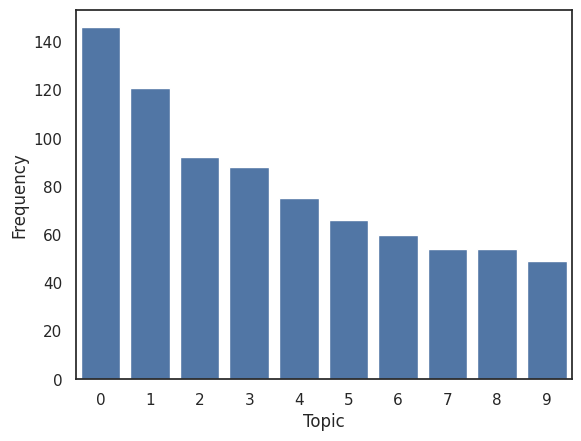

In [23]:
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='#4374B3')

In [18]:
text_clean_rep = pd.read_excel("speeches_sentences_cleaned_rep.xlsx")
embeddings_rep = sentence_model.encode(text_clean_rep['clean_text'], show_progress_bar=False)

In [19]:
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(text_clean_rep['clean_text'].astype('str'), embeddings_rep)

In [20]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

In [21]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
text_clean_rep['topic_prediction'] = topic_prediction
# Subset the top 10 topics
text_top_topics = text_clean_rep.loc[text_clean_rep['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,146
1,1,121
2,2,92
3,3,88
4,4,75
5,5,66
6,6,60
7,7,54
8,8,54
9,9,49


<Axes: xlabel='Topic', ylabel='Frequency'>

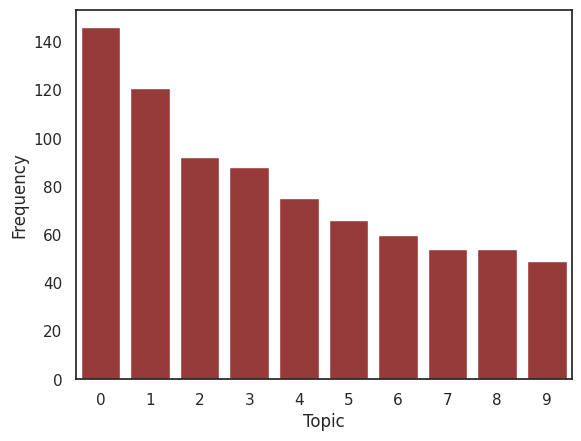

In [22]:
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='#A62C2B')